It is important to apply gradient descent to reach min/max of objective function and understand gradient descent and distinguish between:
1. batch gradient descent
2. stochastic gradient descent
3. mini-batch gradient descent

## Calculate minimum

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

mpl.rcParams['figure.figsize'] = [8,4]

x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)
X,Y = np.meshgrid(x,y)
z = lambda x,y:np.sin(np.sqrt(x**2 + y**2))

In [2]:
def test_converge(param1, param2, epi):
    """
    Test if parameter converges, use square root Euclidean distance
    """
    # np.sqrt(sum([pow(i-j,2) for (i,j) in zip(param1,param2)]))
    dist = np.linalg.norm(param1-param2)
    return True if dist < epi else False

In [3]:
def bgd_min(x0,a,gds,num_iter,epi):
    """
    Calculate function minimum
    
    Arguments:
    x0 -- initial point
    a  -- step
    gds -- function
    num_iter -- number of iterations
    epi -- test if converges
    
    Returns:
    numpy array of updated params on the way to reach minimum
    """
    px = []
    for i in range(num_iter):
        xnew = [xi - a*gdi(xi) for (xi,gdi) in zip(x0,gds)]
        px.append(xnew)
        if sum([pow(i-j,2) for (i,j) in zip(x0,xnew)]) <= epi:
            break
        x0 = xnew
    return np.array(px)

x0 = np.array([5,5])
num_iter = 100
a = 0.01
epi = 0.001
gd1 = lambda x:1.4*x
gd2 = lambda y:3
gs = [gd1,gd2]

px = bgd_min(x0,a,gs,num_iter,epi)

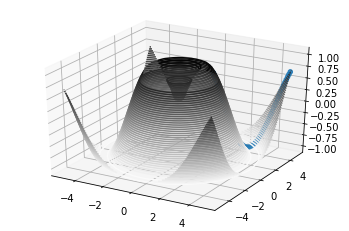

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,z(X,Y),50,cmap='binary')
ax.scatter(px[:,0],px[:,1],z(px[:,0],px[:,1]))

## Batch gradient descent
Repeat until convergence:
$$\theta_j:=\theta_j+\alpha\Sigma_{i=1}^{m}(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)})$$

In [5]:
x1 = np.random.randn(100)
x2 = np.random.randn(100)
flabel = lambda x,y:1 if (x+y)>0.5 else 0
labels = np.array([flabel(i,j) for (i,j) in zip(x1,x2)])

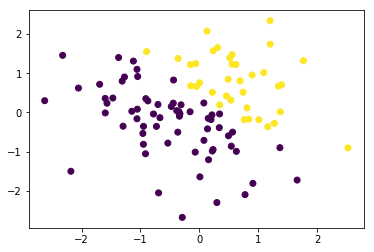

In [6]:
plt.scatter(x1,x2,c=labels)

Based on $Y|X,\theta$ ~ $Bernouli(p)$, $L = \Pi \hat{y}^{y_i}(1-\hat{y})^{y_i}$

$$p(y_i=1|x;\theta)=\hat{y}=\sigma(\theta^{T}x) = h_\theta(x)$$
$$p(y_i=0|x;\theta)=1-\hat{y}$$

$\sigma$ is sigmoid function and $h_\theta(x) = \frac{1}{1+e^{-\theta^{T}x}}$

$$logL = \Sigma y_i\hat{y_i} + (1-y_i)log(1-\hat{y_i})$$

$$J(\theta) = -\frac{1}{m}logL$$



In [7]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

def sigmoid_grad(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

def batch_gd(theta0,alpha,x,y,num_iter,epi):
    """
    Arguments:
    theta0 -- initial parameter vector: n*1
    x -- input matrix n*m, n: number of features, m: number of records
    y -- input matrix 1*m
    epi -- threshold for convergence control
    
    Returns:
    updated parameter vector: n*1
    """
    for i in range(num_iter):
        z = np.dot(theta0.T,x)
        a = sigmoid(z)
        dz = a - y # 1*m
        dw = np.dot(x,dz.T)/y.shape[1]
        theta_new = theta0 - alpha*dw
        if test_converge(theta0,theta_new,epi):
            print ("stop at iteration {}".format(i))
            break
        theta0 = theta_new
    return theta0

In [8]:
theta0 = np.random.randn(3).reshape((3,-1))
m = len(x1)
inputs = np.vstack([np.ones(m).reshape((1,-1)),x1.reshape((1,-1)),x2.reshape((1,-1))])
y = labels.reshape((1,-1))
theta_update = batch_gd(theta0,0.1,inputs,y,1000,0.01)

stop at iteration 87


In [9]:
b,b1,b2 = theta_update
print (b,b1, b2)

[-0.77775111] [1.33715523] [1.37776578]


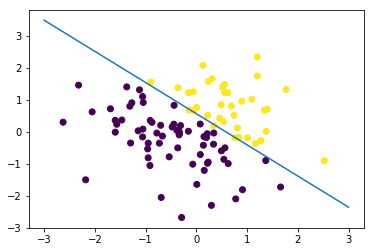

In [10]:
lx1 = np.linspace(-3,3,30)
lx2 = (-b-b1*lx1)/b2

plt.scatter(inputs[1,],inputs[2,],c=labels)
plt.plot(lx1,lx2)

In [11]:
# validate result
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
input_x = np.hstack([x1.reshape((-1,1)),x2.reshape((-1,1))])
model.fit(input_x,labels.reshape(-1,1))

/Applications/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
model.coef_

array([[2.59951887, 2.54709342]])

In [13]:
model.intercept_

array([-1.16584509])

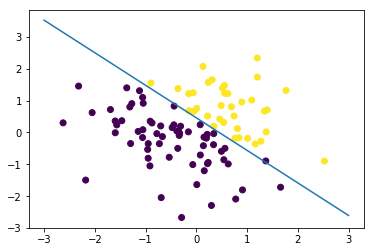

In [14]:
lx1 = np.linspace(-3,3,30)
lx2 = (-model.intercept_[0]-lx1*model.coef_[0][0])/model.coef_[0][1]

plt.scatter(x1,x2,c=labels)
plt.plot(lx1,lx2)

## Stochastic gradient descent
Whereas batch gradient descent has to scan through the entire training set before taking a single step--stochastic gradient descent can start making progress right away, and continues to make progress with each example it looks at. Often, stochastic gradient descent gets $\theta$ "close" to the minimum much faster than batch gradient descent. For these reasons, particularly when the training set is large, stochastic gradient descent is often preferred over batch graidnet descent.

In [15]:
inputs = np.vstack([np.ones(m).reshape((1,-1)),x1.reshape((1,-1)),x2.reshape((1,-1))])
y = labels.reshape((1,-1))

def sgd(theta0,alpha,x,y,num_iter,epi):
    """
    Arguments:
    theta0 -- initial parameter vector: n*1
    x -- input matrix n*m, n: number of features, m: number of records
    y -- input matrix 1*m
    
    Returns:
    updated parameter vector
    """
    
    # [optional] shuffle x in sgd
    # not not to use np.random.shuffle(x), it will change inputs but not y accordingly
    m = y.shape[1]
    idx = np.random.permutation(m)
    x = x[:,idx]
    y = y[:,idx]
    
    for i in range(num_iter):
        for j in range(m):
            xj = x[:,j].reshape((-1,1))
            z = np.dot(theta0.T,xj)
            a = sigmoid(z)
            dz = a - y[:,j]
            theta_new = theta0 - alpha*np.dot(xj,dz)
            if test_converge(theta0,theta_new,epi):
                print ("stop at iteration {}".format(i))
                return theta_new
            theta0 = theta_new
    return theta0

theta0 = np.random.randn(3).reshape((3,-1))
theta_update_sgd = sgd(theta0,0.1,inputs,y,1000,0.001)

stop at iteration 1


In [16]:
sb,sb1,sb2 = theta_update_sgd

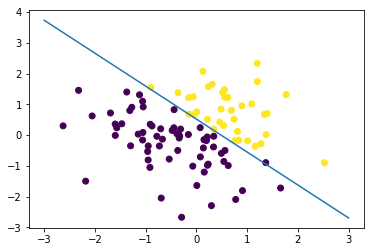

In [17]:
lx1 = np.linspace(-3,3,30)
lx2 = (-sb-sb1*lx1)/sb2

plt.scatter(inputs[1,],inputs[2,],c=labels)
plt.plot(lx1,lx2)

## Mini-batch gradient descent

In [18]:
def minibatch(theta0,alpha,x,y,subset_rate,num_iter,epi):
    """
    Arguments:
    theta0 -- initial parameter vector: n*1
    x -- input matrix n*m, n: number of features, m: number of records
    y -- input matrix 1*m
    epi -- threshold for convergence control
    
    Returns:
    updated parameter vector: n*1
    """
    m = y.shape[1]
    # get subset size
    k = int(m*subset_rate)
    
    for i in range(num_iter):
        # randomly select subset
        idx = np.random.randint(m, size=k)
        xsub, ysub = x[:,idx],y[:,idx]
        z = np.dot(theta0.T,xsub)
        a = sigmoid(z)
        dz = a - ysub # 1*m
        dw = np.dot(xsub,dz.T)/k
        theta_new = theta0 - alpha*dw
        if test_converge(theta0,theta_new,epi):
            print ("stop at iteration {}".format(i))
            break
        theta0 = theta_new
    return theta0

theta0 = np.random.randn(3).reshape((3,-1))
theta_mini = minibatch(theta0,0.1,inputs,y,0.3,1000,0.01)

stop at iteration 136


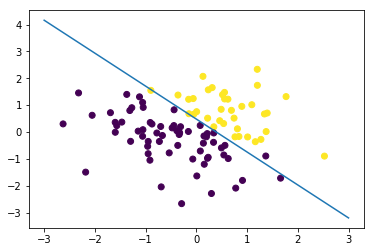

In [19]:
mb,mb1,mb2 = theta_mini
lx1 = np.linspace(-3,3,30)
lx2 = (-mb-mb1*lx1)/mb2

plt.scatter(inputs[1,],inputs[2,],c=labels)
plt.plot(lx1,lx2)